# **Implementing & Visualizing Gradient Descent**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [73]:
np.random.seed(42)  # to make this code example reproducible
m = 200  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 4 * X + np.random.randn(m, 1)  # column vector

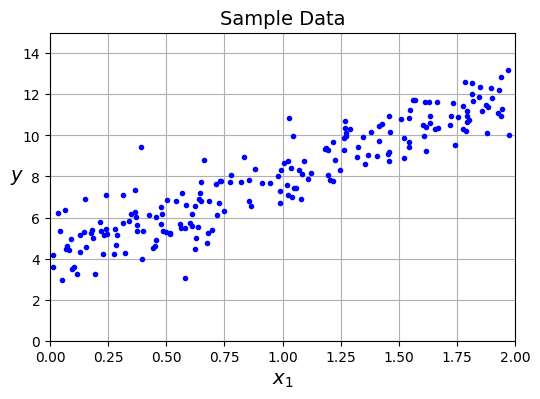

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Sample Data")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [74]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

## **Batch Gradient Descent**

In [22]:
eta  = 0.1 # --> Learning Rate
n_epochs = 1000
m = len(X_b) # --> Number of Instances

np.random.seed(42)
theta = np.random.randn(2, 1) # --> Randomly Intialize Model Parameters

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients # --> Update Parameters

In [23]:
theta

array([[4.10520115],
       [3.96096447]])

In [82]:
# Visualize Batch Gradient Descent
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path_bgd = []  # Initialize theta_path_bgd here

    for epoch in range(n_epochs):
      if epoch < n_shown:
        y_predict = X_new_b @ theta
        color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
        plt.plot(X_new, y_predict, linestyle='solid', color=color)

      # Compute Gradient
      gradients = 2 / m * X_b.T @ (X_b @ theta - y)
      theta = theta - eta * gradients # --> Update Parameters
      theta_path_bgd.append(theta)  # Append to theta_path_bgd

    plt.xlabel("$x_1$")
    plt.axis([0,2,0,15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")

    return theta_path_bgd

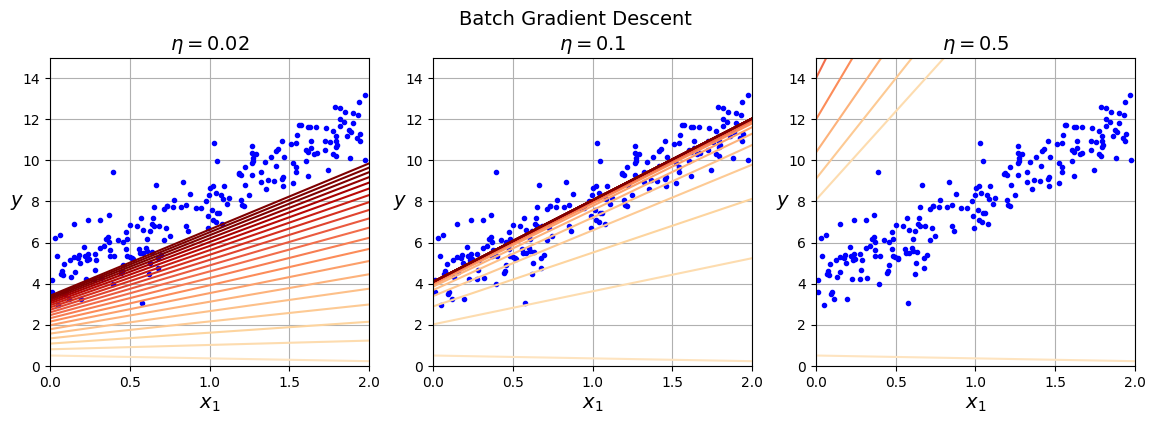

In [83]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(14,4))

plt.subplot(131); theta_path_bgd_02 = plot_gradient_descent(theta.copy(), eta=0.02) # --> 1
plt.ylabel("$y$", rotation = 0)

plt.subplot(132); theta_path_bgd_01 = plot_gradient_descent(theta.copy(), eta=0.1) # --> 2
plt.ylabel("$y$", rotation = 0)

plt.subplot(133); theta_path_bgd_05 = plot_gradient_descent(theta.copy(), eta=0.5) # --> 3
plt.ylabel("$y$", rotation = 0)

plt.suptitle("Batch Gradient Descent", y= 1, fontsize=14)
plt.show()

## **Stochastic Gradient Descent**

In [38]:
theta_path_sgd = []

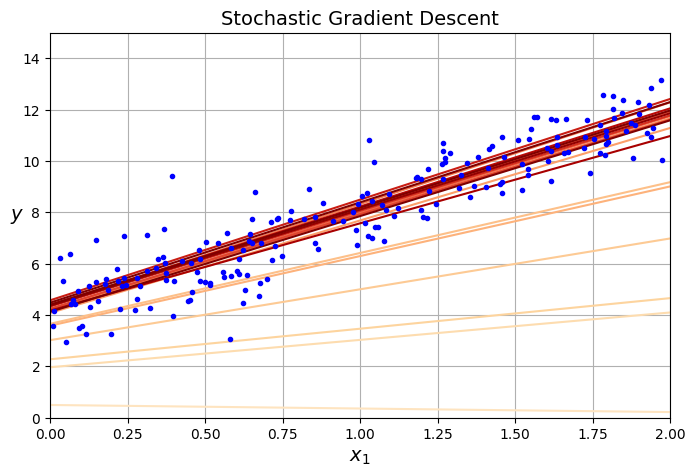

In [42]:
m = len(X_b)  # number of instances
n_epochs = 50
t0, t1 = 5, 50 # --> Learning Schedule

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # --> Random Initialization Parameters

n_shown = 20
plt.figure(figsize=(8,5))

for epoch in range(n_epochs):
  for iteration in range(m):
    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, linestyle='solid', color=color)

    random_index = np.random.randint(m)
    x_i = X_b[random_index : random_index + 1]
    y_i = y[random_index : random_index + 1]
    gradients = 2 * x_i.T @ (x_i @ theta - y_i) # --> for SGD, do not divide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

# Plot
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.title("Stochastic Gradient Descent")
plt.show()


In [43]:
theta

array([[4.10597033],
       [3.96337763]])

## **Mini-batch Gradient Descent**

In [86]:
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

In [68]:
from math import ceil

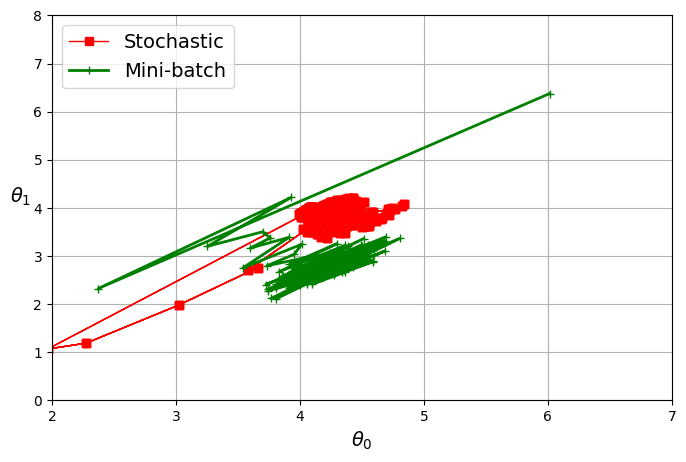

In [88]:
m = len(X_b)
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1) # --> Random Initialization

t0, t1 = 200, 500 # --> Learning Schedule

def learning_schedule(t):
  return t0 / (t + t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        x_i = x_b_shuffled[idx : idx + minibatch_size]
        y_i = y_shuffled[idx : idx + minibatch_size]

        gradients = 2 / minibatch_size * x_i.T @ (x_i @ theta - y_i)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# Plot
plt.figure(figsize=(8,5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label='Mini-batch')
#plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label='Batch')
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2, 7, 0, 8])
plt.grid()
plt.show()